## Instalação

Tal como outras bibliotecas para a linguagem Python, a SymPy pode ser instalado com o comando `pip`.

Para usar funções SymPy num programa é preciso fazer a importação da biblioteca com a instrução `import`

In [52]:
!pip install sympy

import sympy as sp
print(sp.__version__)

1.10.1


## Matemática Simbólica

A biblioteca SymPy distingue-se da biblioteca de matemática normal do Python (math), por não realizar os cálculos quando estes dão um resultado aproximado. Por exemplo:

In [53]:
import math
import sympy

print(math.sqrt(12))
print(sympy.sqrt(12))

3.4641016151377544
2*sqrt(3)


Apesar de não apresentar o resultado numérico, a biblioteca SymPy simplifica-o sem perder precisão.

## Formatação do Resultado

Por omissão as expressões usadas na biblioteca SymPy são apresentada em forma de texto como no exemplo anterior.

Pode ser mais conveniente a utilização de um formatador dos resultados (_pretty-printer_) que os apresente na forma habitual de um equação matemática.

In [62]:
import sympy as sp
sp.init_printing()

sp.sqrt(12)

Para apresentar um resultado sem ser a saída do código Python, pode-se usar a função `display()` que se encarrega de apresentar o objeto na forma mais adequada.

In [65]:
display(sp.sqrt(12))

Pode-se também usar uma das funções `print_xxx()` para apresentar o resultado em diferentes formatos.

In [71]:
sp.print_latex(sp.sqrt(12))
sp.print_python(sp.sqrt(12))

2 \sqrt{3}
e = 2*sqrt(3)


## Símbolos

A classe `Symbol`é a mais importante em SymPy pois permite definer que uma cadeia de carateres representa um símbolo que pode ser atribuído a uma variável usando a função `symbol()`. Com essas variáveis é possível definir uma expressão simbólica

In [73]:
x = sp.Symbol('x')
y = sp.Symbol('y')
expr = x**2 + y**2
display(expr)

A função `symbols()` permite a atribuição de vários símbolos a várias variáveis.

In [75]:
x,y,z = sp.symbols("x,y,z")
expr = sp.sqrt(x**2 + y**2 + z**2)
display(expr)

## Expressões

Em SymPy é possível manipular expressões algébricas.

In [77]:
expr = sp.sin(x)**2 + sp.cos(x)**2 
display(expr)
expr1 = expr.subs(x,y)
display(expr1)

O método `subs()` também é útil para avaliar a expressão para um valor

In [78]:
expr_pi = expr.subs(x,sp.pi)
display(expr_pi)

A função `sympify()` converte uma cadeia de carateres contendo uma expressão matemática, numa expressão que pode ser manipulada pela SymPy.

In [79]:
expr = sp.sympify("x**2+3*x+2")
display(expr)
display(expr.subs(x,3))

Uma expressão em SymPy pode ser convertida numa função Python com a função `lambdify()`. A função resultante converte os nomes SymPY para os de uma biblioteca numérica, normalmente o NumPy.

In [80]:
expr = 1/sp.sin(x)
f = sp.lambdify(x, expr)
print(f(3.14))

627.8831939138764


Para especificar o uso do NumPy:

In [81]:
import numpy as np
expr = x**2
f = sp.lambdify(x , expr, "numpy")
print(f(np.arange(1,6)))

[ 1  4  9 16 25]


## Simplificação de Expressões

Uma das facilidades mais importantes da biblioteca SymPy é a simplificação de expressões algébricas com a função `simplify()`.

In [83]:
x = sp.Symbol('x')
expr = sp.sin(x)**2 + sp.cos(x)**2
display(expr, sp.simplify(expr))

Outra facilidade da SymPy é a expansão de expressões polinomiais com a função `expand()`. 

In [84]:
a,b = sp.symbols('a b')
expr = (a + b) ** 2
display(expr, sp.expand(expr))

É também possível fatorizar um polinómio

In [85]:
x,y,z = sp.symbols('x y z') 
expr = x**2*z + 4*x*y*z + 4*y**2*z
display(expr, sp.factor(expr))
print(' ')
expr = a**2 + 2*a*b + b**2
display(expr, sp.factor(expr))

A função `collect()` junta termos aditivos de uma expressão com respeito a potências de expoente racional de uma variável ou expressão.

In [86]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
display(expr, sp.collect(expr,x))

A função `cancel()` simplifica funções racionais e converte-as na forma canónica $p/q$ em que $p$ e $q$ são polinómios sem fatores comuns.

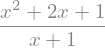

In [87]:
numer = x**2 + 2*x + 1
denom = x + 1
display(numer/denom, sp.cancel(numer/denom))

## Derivadas e Integrais

A biblioteca SymPy inclui a função `diff()` que calcula a expressão algébrica que é a derivada de outra expressão. Para calcular
$$
y' = \frac{d}{dx} \left( x sin(x^2) + 1 \right)
$$

In [90]:
expr = x * sp.sin(x**2) + 1
display(sp.diff(expr, x))

A função `integrate()` faz a operação inversa, ou seja, calcula o integral da expressão.
$$
y = \int ( x^2 + x + 1) dx
$$

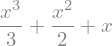

In [91]:
expr = x**2 + x + 1
display(sp.integrate(expr, x))

É também possível calcular integrais definidos, por exemplo
$$
y = \int_0^\infty e^{-x^2} dx
$$

In [92]:
expr = sp.exp(-x**2)
display(sp.integrate(expr,(x,0,sp.oo)))

## Números Complexos

A biblioteca SymPy tem um conjunto de funções para manipular expressões com números complexos. Para definir a parte complexa de um número usa-se o símbolo `I`.

In [100]:
z = sp.Symbol('z', complex=True)
expr = sp.exp(z)
display(expr)
display(expr.subs(z,sp.I * sp.pi/2))

Algumas funções

In [110]:
z = sp.Symbol('z', complex=True)
expr_z = sp.exp(z)

display(expr_z)

display(sp.re(expr_z)) # parte real
display(sp.im(expr_z)) # parte imaginária
display(sp.Abs(expr_z)) # módulo
display(sp.arg(expr_z)) # fase
display(sp.conjugate(expr_z)) # conjugado

## Gráficos

O SymPy permite visualizar gráficos de funções

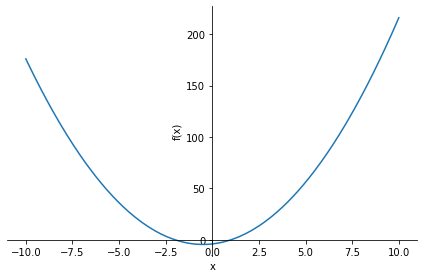

In [117]:
expr = 2*x**2 + 2*x -4
display(expr)
display(sp.plot(expr))

## Resolução de Equações

A biblioteca SymPy inclui a função `solve()` para determinar os zeros de uma função. 

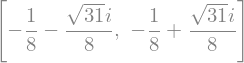

In [132]:
expr = 8*x**2 + 2*x + 4
display(expr)
display(sp.solve(expr))

A função `solve()` pode também ser usada para resolver sistemas de equações:

In [133]:
x, y = sp.symbols('x, y')
sist = [x + y - 2, x - y - 0]
display(sist)
sol = sp.solve(sist, [x, y])
display(sol)
print('x =', sol[x], 'y =', sol[y]) # sol é um dicionário

x = 1 y = 1
